In [5]:
import cv2
from matplotlib import pyplot as plt
import numpy as np 
import imutils
import easyocr

In [3]:
path = "data\\1-1\\1-1-drawing_page-0007.jpg"

In [14]:
def cropped(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    bfilter = cv2.bilateralFilter(gray, 15, 20, 20)
    edged = cv2.Canny(bfilter, 30, 200)

    keypoint = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(keypoint)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

    mask = np.zeros(gray.shape, np.uint8)
    location = None

    for contour in contours:
        # print(i)
        approx = cv2.approxPolyDP(contour, 10, True)
        if len(approx) == 4:
            max_x = max(approx[:,:,1])
            min_x = min(approx[:,:,1])
            max_y = max(approx[:,:,0])
            min_y = min(approx[:,:,0])

            x_lenght = max_x-min_x
            y_lenght = max_y-min_y

            if x_lenght > 500 and y_lenght > 500:
                location = approx
                break

    if location is not None:
        new_image = cv2.drawContours(mask, [location], 0, 255, -1)
        new_image = cv2.bitwise_and(img, img, mask=mask)

        (x, y) = np.where(mask==255)
        (x1, y1) = (np.min(x), np.min(y))
        (x2, y2) = (np.max(x), np.max(y))
        cropped_image = gray[x1:x2+1, y1:y2+1]
        plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

In [15]:
img = cv2.imread(path)

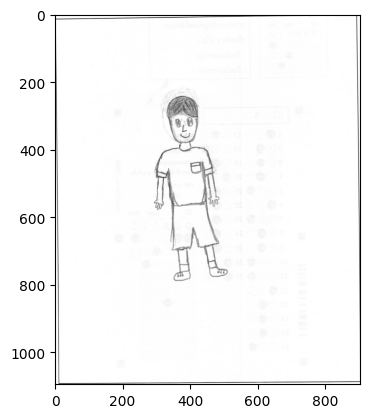

In [16]:
cropped(img)

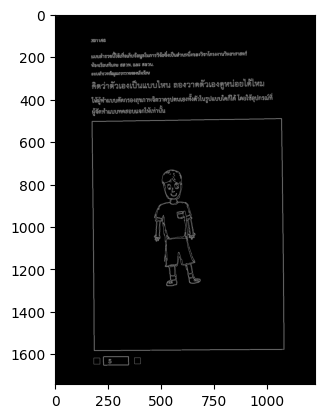

In [10]:


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

bfilter = cv2.bilateralFilter(gray, 15, 50, 50)
edged = cv2.Canny(bfilter, 100, 200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

keypoint = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoint)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:20]

In [6]:
location = None
i = 0
max_int = -1500

for contour in contours:
    i+=1
    print(i)
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    if len(approx) == 4:
        # print(max(i[0]))
        # print("===========")
        max_x = max(approx[:,:,1])
        min_x = min(approx[:,:,1])
        max_y = max(approx[:,:,0])
        min_y = min(approx[:,:,0])
        wid = max_x - min_x
        hig = max_y - min_y

        print(approx)
        print(wid, " ", hig)
        print("++++++++++++++++++++++++++++++++")

        if wid > 25 and hig > 25:
            max_int = max_x
            location = approx
            print("-")


1
[[[ 79  23]]

 [[ 78  52]]

 [[107  52]]

 [[106  23]]]
[29]   [29]
++++++++++++++++++++++++++++++++
-
2
[[[ 78  24]]

 [[105  23]]

 [[107  51]]

 [[ 80  53]]]
[30]   [29]
++++++++++++++++++++++++++++++++
-
3
[[[270  21]]

 [[269  50]]

 [[298  50]]

 [[298  21]]]
[29]   [29]
++++++++++++++++++++++++++++++++
-
4
[[[269  22]]

 [[297  21]]

 [[298  49]]

 [[271  51]]]
[30]   [29]
++++++++++++++++++++++++++++++++
-
5
6
7
8
9
[[[242  17]]

 [[241  56]]

 [[125  55]]

 [[242  56]]]
[39]   [117]
++++++++++++++++++++++++++++++++
-
10
11
12
[[[123  17]]

 [[123  57]]

 [[142  58]]

 [[123  57]]]
[41]   [19]
++++++++++++++++++++++++++++++++
13


In [7]:
location = None
i = 0
mask = np.zeros(gray.shape, np.uint8)

for contour in contours:
    i+=1
    print(i)
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    if len(approx) == 4:
        location = approx
        new_image = cv2.drawContours(mask, [location], 0, 255, -1)
        new_image = cv2.bitwise_and(img, img, mask=mask)

        (x, y) = np.where(mask==255)
        (x1, y1) = (np.min(x), np.min(y))
        (x2, y2) = (np.max(x), np.max(y))
        cropped_image = gray[x1:x2+1, y1:y2+1]

        reader = easyocr.Reader(['en'])
        result = reader.readtext(cropped_image)

        if (result!=[]):
            break


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


1


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


2


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


3


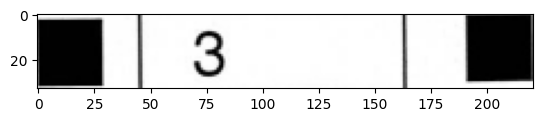

In [8]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


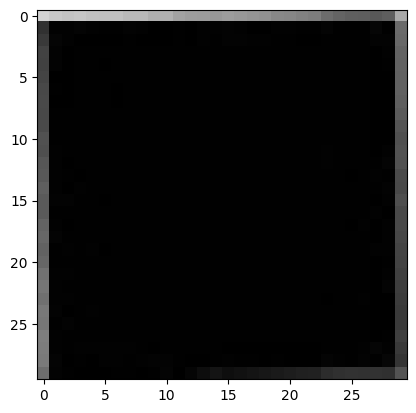

In [9]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

(x, y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)

plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [10]:
result[0][1]

IndexError: list index out of range

In [ ]:
# original_img = cv2.imread(path)
# Id = result[0][1].rjust(3, '0')
# cv2.imwrite(f'data_label\\{Id}.jpg', original_img)